<a href="https://colab.research.google.com/github/bahgat-ahmed/Abstractive-Text-Summarization/blob/master/5%20-%20Algorithms'%20Implementations/Linear_Regression_Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Notes

I was guided a lot in this Notebook with that text book [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291).

Having a good understanding of how things work can help you quickly home in on the
appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task.
Understanding what’s under the hood will also help you debug issues and perform error analysis more
efficiently.

The most common performance measure
of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). Therefore,
to train a Linear Regression model, you need to find the value of θ that minimizes
the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE)
than the RMSE, and it leads to the same result (because the value that minimizes a
function also minimizes its square root).

#1. Load and Fit Dataset using sklearn `LinearRegression` which uses Ordinary Least Square Optimization (OLS) technique by default

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
# use the random state for having reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Regressor Coefficients

In [5]:
print("Beta: ", *regressor.coef_)
print("Alpha: ", regressor.intercept_)

Beta:  9332.94473799272
Alpha:  25609.89799835482


#2. Implement the Normal equation closed form solution (General for N-dimension)

> The Normal Equation computes the inverse of XT · X, which is an n × n matrix
(where n is the number of features). The *computational complexity* of inverting such a
matrix is typically about O(n2.4) to O(n3) (depending on the implementation). Therefore, the Normal Equation gets very slow when the number of features
grows large (e.g., 100,000).

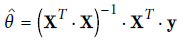

In [6]:
def normal_eqn_closed_form_soln(X, y):
    # add the bias term (the intercept) (i.e. add x0 = 1 to each instance )
    X = np.c_[np.ones((len(X), 1)), X]
    # compute theta
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # return theta in (beta, alpha) order when n = 2
    return theta[-1::-1]

In [7]:
beta, alpha = normal_eqn_closed_form_soln(X_train, y_train)
print("Beta: ", beta)
print("Alpha: ", alpha)

Beta:  9332.944737992713
Alpha:  25609.89799835491


#3. Impementing Optimization Algorithms

**[OLS vs Gradient Descent](https://www.saedsayad.com/gradient_descent.htm)**

**Ordinary least squares (OLS)** is a non-iterative method that fits a model such that the sum-of-squares of differences of observed and predicted values is minimized. **Gradient descent** finds the linear model parameters iteratively. The gradient will act like a compass and always point us downhill.

##3.1 Implement OLS Method from scratch using the following dervied equations from [this article](https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc).

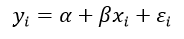

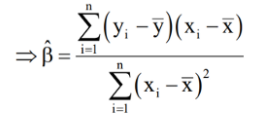

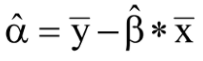

In [8]:
def O_L_S(x, y):
    # adjust dimensions to be all one dimensional vector
    x = x.flatten()
    y = y.flatten()

    arr_len = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    beta = np.sum(np.multiply((y - [y_mean] * arr_len), (x - [x_mean] *
                                arr_len)))/np.sum((x - [x_mean]*arr_len)**2)
    alpha = y_mean - (beta * x_mean)
    return beta, alpha

### Implemented Function Coefficients (Same Results)

In [9]:
beta, alpha = O_L_S(X_train, y_train)
print("Beta: ", beta)
print("Alpha: ", alpha)

Beta:  9332.944737992724
Alpha:  25609.897998354805


##3.2 Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal
solutions to a wide range of problems. The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

> When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

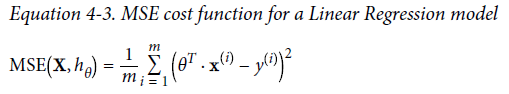

**We want to minimize that COST Function (Minimize Error).**

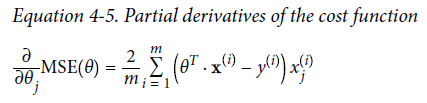

Instead of computing these gradients individually, you can use Equation 4-6 to compute
them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial
derivatives of the cost function (one for each model parameter).

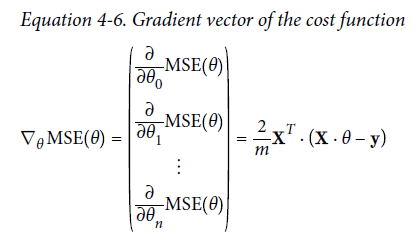

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called *Batch Gradient Descent*: it uses the whole batch of training
data at every step. As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms
shortly). However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation.

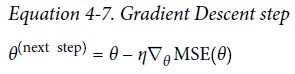

In [10]:
def gradient_descent(X, y, lr, num_iter: int):
    # reshape y to explicitly have the dimension (2, 1)
    y = y.reshape(-1, 1)
    # number of training data
    m = X.shape[0]
    # add the bias term (the intercept) (i.e. add x0 = 1 to each instance )
    X = np.c_[np.ones((m, 1)), X]
    # initialize theta randomly (sample from the “standard normal” distribution)
    # with array dimensions (2, 1)
    theta = np.random.randn(2, 1)
    for _ in range(num_iter):
        # calculate the gradient
        delta_theta = (2/m) * X.T.dot((X.dot(theta)) - y)
        # update theta
        theta -= lr * delta_theta
    # return theta in (beta, alpha) order when n = 2
    return theta[-1::-1]

In [11]:
beta, alpha = gradient_descent(X_train, y_train, 0.02, 3000)
print("Beta: ", *beta)
print("Alpha: ", *alpha)

Beta:  9332.944737993022
Alpha:  25609.897998352713


#4. Conclusion

All produced the same results.